# Vector Semantics

>### Today
>
>- [Extracting Co-occurrences](#Extracting-Co-occurrences)
>
>
>- [Sparse Vectors](#Sparse-Vectors)
>
>
>- [Calculating Cosine Similarities](#Calculating-Cosine-Similarities)
>
>
>- [Visualizing Similarities](#Visualizing-Similarities)
>
>
>- [Evaluating your Model](#Evaluating-your-Model)
>
>
>- [Working with Dense Vectors](#Working-with-Dense-Vectors)

#### Packages

There are many Python packages that allows you to create or manipulate vector space models:

- the NLTK [collocations](http://www.nltk.org/howto/collocations.html) and [metrics](http://www.nltk.org/howto/metrics.html) modules


- the Scikit-learn [data transformation](http://scikit-learn.org/stable/data_transforms.html) libraries 


- the [Gensim](https://radimrehurek.com/gensim/) toolkit


- the [Dissect](http://clic.cimec.unitn.it/composes/toolkit/) toolkit

We will use some of them in more depth in the future, for now you mainly need NLTK.

---

## Extracting Co-occurrences

We'll work with the **sentence splitted, tokenized, pos-tagged and lemmatized** version of the Brown corpus:


- filtering out the punctuation marks and words tagged as "X" (i.e. "OTHER");


- concatenating the lemma and the pos in the following way "be-VERB";

In [1]:
import nltk

In [2]:
from nltk.corpus import wordnet as wn
un2wn_mapping = {"VERB" : wn.VERB, "NOUN" : wn.NOUN, "ADJ" : wn.ADJ, "ADV" : wn.ADV}

brown_lemmatized = []

for sentence in nltk.corpus.brown.tagged_sents(tagset='universal'):
    lemmatized_sentence = []
    for w, p in sentence:
        if p in [".", "X"]:
            continue
        elif p in un2wn_mapping.keys():
            lemma = nltk.WordNetLemmatizer().lemmatize(w, pos = un2wn_mapping[p])
        else:
            lemma = nltk.WordNetLemmatizer().lemmatize(w)
        lemmatized_sentence.append("-".join([lemma, p]))
        
    brown_lemmatized.append(lemmatized_sentence)

In [3]:
brown_lemmatized[0]

['The-DET',
 'Fulton-NOUN',
 'County-NOUN',
 'Grand-ADJ',
 'Jury-NOUN',
 'say-VERB',
 'Friday-NOUN',
 'an-DET',
 'investigation-NOUN',
 'of-ADP',
 "Atlanta's-NOUN",
 'recent-ADJ',
 'primary-NOUN',
 'election-NOUN',
 'produce-VERB',
 'no-DET',
 'evidence-NOUN',
 'that-ADP',
 'any-DET',
 'irregularity-NOUN',
 'take-VERB',
 'place-NOUN']

### from co-occurrences...

```
…ound and sonic power of a [new electric   guitar  played through] a guitar amp has play…
                         …[Some electric   guitar  models feature] piezoelectric pickups…
                               …[Playing   guitar  with a] pick produces a bright sound …
…ings, he is known for [playing fretless   guitar  in his] performances…
               …the neck of [a classical   guitar  is too] wide and the normal position …
…t in the centre of Bristol [playing the   piano   , I was] punched in the head while, a…
…r in Houston, Texanstagram [playing the   piano   in his] flooded home after Hurrican H…
… some supplies, he stopped to [play the   piano   that was] sitting in knee-high water …
…te and one black, who [played classical   piano   together]…
                    …The [first electric   pianos  from the] late 1920s used metal strin…
…technologies, for example [the electric    car    and the] integration of mobile commun… 
…study had each driver of [each electric    car    drive unimpeded], perform a task whil…
…Honda to commence testing of [their new    car    and the] American was no doubt more t…
…mary design considerations for [the new    car    were "safety] innovations, performanc…
…would be possible if almost [all private   cars   requiring drivers], which are not in …
… who donate to groups [providing private  school  scholarships have] written pieces att…
… that students participating [in private  school  choice programs] graduate high school…
…s in the establishment of this [new high  school  , named the] Gavirate Business School…
         …Anna heads into her [final high  school  year before] university wanting somet…
… but he can prevent them from [playing at school]
```

Before counting co-occurrences, it is crucial to have a clear idea of:

- what our target words are : **what do we want to study?** 
    - E.g., in what follows we will focus on nouns.


- what our contexts are: **how do we want to characterize our target words?** 
    - E.g., in what follows we will use the co-occurring words as contexts; 
    - other possibilities could have been: solely verbs, solely open class words, a mixture of PoS-tags and lexicalized elements...
    
**Textual co-coccurrence counts** between a target word and a contextual word are obtained by counting the number of text segments (i.e. sentences, in our case) in which they co-occur one or more times.

In [4]:
from itertools import permutations
from collections import Counter

In [5]:
cooccs_textual = Counter()

for sentence in brown_lemmatized:
    cooccs_textual.update([pair for pair in set(permutations(sentence, 2)) if pair[0].split("-")[-1] == "NOUN"])

In [6]:
cooccs_textual.most_common(10)

[(('time-NOUN', 'the-DET'), 1285),
 (('year-NOUN', 'the-DET'), 1100),
 (('time-NOUN', 'be-VERB'), 1067),
 (('time-NOUN', 'of-ADP'), 885),
 (('year-NOUN', 'be-VERB'), 881),
 (('year-NOUN', 'of-ADP'), 881),
 (('time-NOUN', 'and-CONJ'), 808),
 (('man-NOUN', 'the-DET'), 771),
 (('time-NOUN', 'a-DET'), 743),
 (('way-NOUN', 'the-DET'), 720)]

In [7]:
# That's pretty dense code. Let's add some prints for logging, to see what is going on...

logbool = 0 # logging boolean. set to 0 to let it run to the end and see the result.

cooccs_textual = Counter()

brown_lemmatized_one = brown_lemmatized[:1]

for sentence in brown_lemmatized_one:
    if logbool: print(sentence, "\n")
    for pair in set(permutations(sentence, 2)):
        if pair[0].split("-")[-1] == "NOUN":
            if logbool: print(pair[0], pair[1])
            if logbool: input("")
        
cooccs_textual.update([pair for pair in set(permutations(sentence, 2)) if pair[0].split("-")[-1] == "NOUN"])

cooccs_textual.most_common(10)

[(('County-NOUN', 'say-VERB'), 1),
 (('Friday-NOUN', 'Jury-NOUN'), 1),
 (('place-NOUN', 'evidence-NOUN'), 1),
 (('Fulton-NOUN', 'produce-VERB'), 1),
 (('County-NOUN', 'investigation-NOUN'), 1),
 (('primary-NOUN', 'investigation-NOUN'), 1),
 (('irregularity-NOUN', 'recent-ADJ'), 1),
 (('investigation-NOUN', 'place-NOUN'), 1),
 (('primary-NOUN', 'say-VERB'), 1),
 (('election-NOUN', 'evidence-NOUN'), 1)]

**Surface co-coccurrence counts** between a target word and a contextual word are obtained by counting how many times a contextual word occurs in a collocational span surrounding the target word. The collocational span can be symmetric or asymmetric. 


In what follows we use a symmetric ±5w span.

In [8]:
spansize = 5

cooccs_surface = Counter()

for sentence in brown_lemmatized:
    for i,w in enumerate(sentence):
        if w.split("-")[-1] == "NOUN":
            span_range = list(range(max(i- spansize, 0), i)) # left side indices (range, then list so we can extend)
            span_range.extend(range(i+1, min(i + spansize + 1, len(sentence)))) # extend by right side indices
            for cw in [sentence[idx] for idx in span_range]:
                cooccs_surface[(w, cw)] += 1

In [9]:
cooccs_surface.most_common(10)

[(('time-NOUN', 'the-DET'), 1130),
 (('year-NOUN', 'the-DET'), 875),
 (('world-NOUN', 'the-DET'), 700),
 (('way-NOUN', 'the-DET'), 665),
 (('man-NOUN', 'the-DET'), 619),
 (('Af-NOUN', 'the-DET'), 610),
 (('day-NOUN', 'the-DET'), 608),
 (('man-NOUN', 'a-DET'), 601),
 (('time-NOUN', 'be-VERB'), 570),
 (('States-NOUN', 'the-DET'), 552)]

In [10]:
logbool = 0 # logging boolean. set to 0 to let it run to the end and see the result.

spansize = 5

cooccs_surface = Counter()

for sentence in brown_lemmatized:
    if logbool: print(" ".join(sentence), "\n")
    for i,w in enumerate(sentence):
        if logbool: print("word:", i, w)
        if w.split("-")[-1] == "NOUN":
            span_range = list(range(max(i-spansize, 0), i))  # left side indices (range, then list so we can extend)
            span_range.extend(range(i+1, min(i + spansize + 1, len(sentence))))  # extend by right side indices
            if logbool: print("span: ", span_range)
            for cw in [sentence[idx] for idx in span_range]:
                cooccs_surface[(w, cw)] += 1
                if logbool: print("count:", w, cw)
        if logbool: input("")
        
for key, value in cooccs_surface.items():
    print(key, ",", value)
    if value >= 2: break

('Fulton-NOUN', 'The-DET') , 1
('Fulton-NOUN', 'County-NOUN') , 6


### ... to (Weighted) Counts


|    *WORD*   |      play |  electric | classical |   private |      high |       ... |       the |       new | 
| ----------- |:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
| **guitar**  |         3 |         2 |         1 |         0 |         0 |       ... |         0 |         1 | 
| **piano**   |         4 |         1 |         1 |         0 |         0 |       ... |         4 |         0 | 
| **car**     |         0 |         2 |         0 |         1 |         0 |       ... |         4 |         2 | 
| **school**  |         1 |         0 |         0 |         2 |         2 |       ... |         1 |         1 | 

For different (yet related) reasons, it is good practice to **filter out**:

- very **infrequent target** items
    - we have too few empirical evidence to draw conclusion about them
    - the minimal threshold is usually determined empirically, by looking at the word distribution
    
    
- very **infrequent contextual** items
    - they mainly slow down the computation, without adding much relevant information
    - this is performed either by selecting the n-top frequent items or by deleting those below an empirically determined threshold
    
    
- very **frequent contextual** items
    - these elements carry little discriminative power
    - this is usually performed by using a stoplist, or by selecting context belonging only to some parts of speech.
    
An example of a list of English stopwords (= words to filter out because they tend to be uninformative) is available in NLTK (but we won't use it yet): ``print(nltk.corpus.stopwords.words('english'))``

#### What can be a suitable filtering strategy for our corpus?

In [11]:
from itertools import chain

import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()

In [12]:
# all words, least frequent...
brown_lemmas_frequencies = Counter(chain(*brown_lemmatized))
print(list(reversed(brown_lemmas_frequencies.most_common()))[:20])

[('stupefy-VERB', 1), ('boucle-NOUN', 1), ('coral-colored-ADJ', 1), ('Cherokee-NOUN', 1), ('olive-flushed-ADJ', 1), ('aviary-NOUN', 1), ('Perelman-NOUN', 1), ('Compassionately-ADV', 1), ('bilharziasis-NOUN', 1), ('fluke-NOUN', 1), ('wilt-NOUN', 1), ('yaw-NOUN', 1), ('Bodhisattva-NOUN', 1), ('horoscope-NOUN', 1), ('pityingly-ADV', 1), ('bathos-NOUN', 1), ('plumb-VERB', 1), ('straightaway-ADV', 1), ('hubris-NOUN', 1), ('beggary-NOUN', 1)]


In [13]:
# ...and most frequent
print(brown_lemmas_frequencies.most_common(20))

[('the-DET', 62710), ('be-VERB', 37099), ('of-ADP', 36078), ('and-CONJ', 27912), ('a-DET', 21872), ('in-ADP', 19066), ('to-PRT', 14742), ('have-VERB', 11675), ('to-ADP', 10985), ('for-ADP', 8833), ('The-DET', 7258), ('with-ADP', 7009), ('it-PRON', 6722), ('he-PRON', 6564), ('his-DET', 6428), ('that-ADP', 6422), ('on-ADP', 5837), ('a-ADP', 5656), ('I-PRON', 5155), ('by-ADP', 5044)]


> Most of the **non-informative frequent contexts** can be filtered out by ignoring **closed class** words together with few semantically "empty" verbs like "be", "have", "do", "would", "will"...

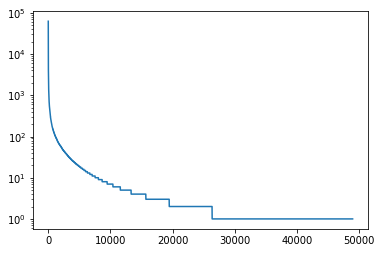

In [14]:
x = np.arange(1, len(brown_lemmas_frequencies) + 1)
y = np.array(sorted(brown_lemmas_frequencies.values(), reverse = True))

plt.plot(x, y)

plt.yscale('log') 

plt.show()

> A Suitable frequency threshold for our contexts could be **10** (mainly due to the small corpus size)

In [27]:
filtered_brown_lemmas_frequencies = Counter()
selected_brown_noun_frequencies = Counter()

for k,v in brown_lemmas_frequencies.items():
    pos = k.split("-")[-1]
    if v >= 10 and \
    pos in ["NOUN", "VERB", "ADJ", "ADV"]\
    and k.split("-")[0] not in ["be", "have", "do", "would", "will", "could"]:
        filtered_brown_lemmas_frequencies[k] = v
        if pos == "NOUN":
            selected_brown_noun_frequencies[k] = v

print(">>", len(filtered_brown_lemmas_frequencies), "context lemmas")
print(filtered_brown_lemmas_frequencies.most_common(20))

>> 7576 context lemmas
[('not-ADV', 4423), ('say-VERB', 2725), ('make-VERB', 2279), ('time-NOUN', 1815), ('go-VERB', 1778), ('when-ADV', 1746), ('can-VERB', 1741), ('other-ADJ', 1627), ('year-NOUN', 1589), ('take-VERB', 1521), ('come-VERB', 1501), ('know-VERB', 1462), ('get-VERB', 1427), ('so-ADV', 1336), ('may-VERB', 1290), ('only-ADV', 1281), ('give-VERB', 1238), ('more-ADV', 1188), ('man-NOUN', 1148), ('see-VERB', 1111)]


In [28]:
print(len(selected_brown_noun_frequencies), "target nouns")

4427 target nouns


In [30]:
filtered_cooccs_surface = Counter()

for k,v in cooccs_surface.items():
    if k[0] in selected_brown_noun_frequencies and k[1] in filtered_brown_lemmas_frequencies:
        filtered_cooccs_surface[k] = v

print(filtered_cooccs_surface.most_common(20))

[(('Af-NOUN', 'Af-NOUN'), 460), (('States-NOUN', 'United-VERB'), 396), (('York-NOUN', 'New-ADJ'), 303), (('year-NOUN', 'ago-ADV'), 150), (('Mrs.-NOUN', 'Mrs.-NOUN'), 120), (('year-NOUN', 'last-ADJ'), 114), (('time-NOUN', 'same-ADJ'), 96), (('Rhode-NOUN', 'Island-NOUN'), 91), (('Island-NOUN', 'Rhode-NOUN'), 91), (('time-NOUN', 'time-NOUN'), 88), (('place-NOUN', 'take-VERB'), 87), (('year-NOUN', 'fiscal-ADJ'), 81), (('school-NOUN', 'high-ADJ'), 77), (('time-NOUN', 'first-ADJ'), 74), (('Mr.-NOUN', 'say-VERB'), 68), (('hand-NOUN', 'other-ADJ'), 66), (('House-NOUN', 'White-ADJ'), 65), (('man-NOUN', 'not-ADV'), 64), (('night-NOUN', 'last-ADJ'), 63), (('World-NOUN', 'War-NOUN'), 62)]


#### Weighting the Counts

- Association measures are used to **give more weight to surprising events** and less weight to expected events.


- Many measures of this sort are available in NLTK (and the other above quoted toolkits as well).


- Let's use the measures we've discussed in class to weight our counts.

In [31]:
print([asm for asm in dir(nltk.collocations.BigramAssocMeasures) if not asm.startswith("_")])

['chi_sq', 'dice', 'fisher', 'jaccard', 'likelihood_ratio', 'mi_like', 'phi_sq', 'pmi', 'poisson_stirling', 'raw_freq', 'student_t']


In [32]:
from math import log

# All functions receive as arguments:
#
#   o_11>> the joint frequency of w1 and w2 >> f(w1, w2)
#   r_1 >> w1 marginals >> f(w1, *)
#   c_1 >> w2 marginals >> f(*, w2)
#   n >> total number of possible coccorrencies >> f(*, *)

# These arguments can be arranged in a contingency table of the form:
#
#          w2    ~w2
#        ------ ------
#    w1 | o_11 | o_12 | = r_1
#        ------ ------
#   ~w1 | o_21 | o_22 | = r_2
#        ------ ------
#        = c_1  = c_2   = n


def ppmi(o_11, r_1, c_1, n):
    """
    Positive Pointwise Mutual Information (Church & Hanks, 1990)
    
    PMI is also available in NLTK:
    from nltk.metrics import BigramAssocMeasures
    print BigramAssocMeasures.pmi(8, (15828, 4675), 14307668)
    """
    observed = o_11
    expected = (r_1*c_1)/n 
    res = log(observed/expected,2)
    return max(0, res)


def plmi(o_11, r_1, c_1, n):
    """
    Positive Local Mutual Information, useful for leveraging the 
    low-frequency bias of the PPMI
    """
    res = o_11 * ppmi(o_11, r_1, c_1, n)
    return res


def log_likelihood(o_11, r_1, c_1, n):
    """
    Log Likelihood measure (Dunning, 1993) or "G-squared" measure 

    NOTE that when o_ii is zero log_2(o_ii) is negative infinity and Python
    raises a ValueError. However, we're summing up o_ii * log_2(o_ii/e_ii)
    and the limit of this factor goes to zero, so that we can simply
    ignore those cells where o_ii is zero
    """
    obs_table = [o_11, r_1 - o_11, c_1 - o_11, n - (c_1 + r_1 - o_11)]  # o_11, o_12, o_21, o_22
    exp_table = [(r_1 * c_1)/ n,
                 (r_1 * (n - c_1))/ n,
                 ((n - r_1) * c_1)/ n,
                 ((n - r_1) * (n - c_1))/ n]  # e_11, e_12, e_21, e_22
    res = 0
    for i, obs in enumerate(obs_table):
        try:
            res += obs * log(obs / exp_table[i])
        except ValueError:
            continue
    res = 2 * res
    return res

In [33]:
ppmis_surface = Counter()

N = sum(cooccs_surface.values())  # note that this is NOT the reduced dictionary

for k,v in filtered_cooccs_surface.items():
    ppmis_surface[k] = ppmi(v, brown_lemmas_frequencies[k[0]], brown_lemmas_frequencies[k[1]], N)
    
print(ppmis_surface.most_common(10))

[(('Hong-NOUN', 'Kong-NOUN'), 17.654091187664235), (('Kong-NOUN', 'Hong-NOUN'), 17.654091187664235), (('Income-NOUN', 'Gross-ADJ'), 17.654091187664235), (('cellulose-NOUN', 'cellulose-NOUN'), 17.46966661652681), (('Income-NOUN', 'Adjusted-VERB'), 17.376557212135328), (('Viet-NOUN', 'Nam-NOUN'), 17.113522806301532), (('Nam-NOUN', 'Viet-NOUN'), 17.113522806301532), (('Pathet-NOUN', 'Lao-NOUN'), 17.026059965051196), (('Lao-NOUN', 'Pathet-NOUN'), 17.026059965051196), (('Simms-NOUN', 'Purdew-NOUN'), 17.026059965051196)]


In [34]:
plmis_surface = Counter()

N = sum(cooccs_surface.values())  # note that this is NOT the reduced dictionary

for k,v in filtered_cooccs_surface.items():
    plmis_surface[k] = plmi(v, brown_lemmas_frequencies[k[0]], brown_lemmas_frequencies[k[1]], N)
    
print(plmis_surface.most_common(10))

[(('States-NOUN', 'United-VERB'), 4787.77840883779), (('Af-NOUN', 'Af-NOUN'), 4620.612036095815), (('York-NOUN', 'New-ADJ'), 3621.1147930991538), (('year-NOUN', 'ago-ADV'), 1464.8885373164483), (('Rhode-NOUN', 'Island-NOUN'), 1258.5533261922783), (('Island-NOUN', 'Rhode-NOUN'), 1258.5533261922783), (('Mrs.-NOUN', 'Mrs.-NOUN'), 1187.8825846241932), (('year-NOUN', 'last-ADJ'), 928.5404042426062), (('House-NOUN', 'White-ADJ'), 851.4369612227013), (('World-NOUN', 'War-NOUN'), 810.2368093216919)]


In [35]:
lls_surface = Counter()

N = sum(cooccs_surface.values())  # note that this is NOT the reduced dictionary

for k,v in filtered_cooccs_surface.items():
    lls_surface[k] = log_likelihood(v, brown_lemmas_frequencies[k[0]], brown_lemmas_frequencies[k[1]], N)
    
print(lls_surface.most_common(10))

[(('States-NOUN', 'United-VERB'), 6953.964479037217), (('Af-NOUN', 'Af-NOUN'), 5998.501456806236), (('York-NOUN', 'New-ADJ'), 5218.669840636507), (('year-NOUN', 'ago-ADV'), 1864.8375330848553), (('Rhode-NOUN', 'Island-NOUN'), 1771.6494950804188), (('Island-NOUN', 'Rhode-NOUN'), 1771.6494950804188), (('Mrs.-NOUN', 'Mrs.-NOUN'), 1465.3982476383976), (('House-NOUN', 'White-ADJ'), 1143.7883279065052), (('S.-NOUN', 'U.-NOUN'), 1133.8897390180484), (('U.-NOUN', 'S.-NOUN'), 1133.8897390180482)]


---

### Exercise 1.

Choose three (frequent) nouns and print their top-associates according to each one of the above implemented association measures.

In [36]:
# your code here

### Exercise 2.

Create a new counter object in which you save all the `ppmi_surface` weighted counts that are referred to pairs occurring less than **50 times**. 

How do things change?

In [37]:
# your code here

---

In [38]:
import math 

from itertools import chain, permutations, product
from collections import Counter

import nltk
import numpy as np
import scipy
import sklearn

import matplotlib.pyplot as plt

from scipy import cluster
from sklearn import manifold, metrics
from nltk.corpus import wordnet as wn

plt.rcdefaults()

---

## Sparse Vectors

![alt text](images/3dvectors.png)

Let's create our vectors by populating a matrix for each of our types of weighted co-occurrences:

In [39]:
# lemma to row/column index mappings
sorted_vectors = sorted(selected_brown_noun_frequencies)
vectors_indices = dict((v,i) for i,v in enumerate(sorted_vectors))
contexts_indices = dict((v,i) for i,v in enumerate(sorted(filtered_brown_lemmas_frequencies)))

In [40]:
# initialize the PPMI-Weighted matrix
ppmiMat = np.zeros((len(vectors_indices), len(contexts_indices)))

# populate the matrix
for pair, weight in ppmis_surface.items():
    ppmiMat[vectors_indices[pair[0]]][contexts_indices[pair[1]]] = weight

In [41]:
# initialize the PLMI-Weighted matrix
plmiMat = np.zeros((len(vectors_indices), len(contexts_indices)))

# populate the matrix
for pair, weight in plmis_surface.items():
    plmiMat[vectors_indices[pair[0]]][contexts_indices[pair[1]]] = weight

In [42]:
# initialize the LL-Weighted matrix
llMat = np.zeros((len(vectors_indices), len(contexts_indices)))

# populate the matrix
for pair, weight in lls_surface.items():
    llMat[vectors_indices[pair[0]]][contexts_indices[pair[1]]] = weight

---

## Calculating Cosine Similarities

![alt text](images/vectors-similarity.png)

The diverse similarity measures we've mentioned in class can be calculated by using the **distance** measures available in virtually all the above cited toolkits, or can be easily implemented. 

For instance, the **cosine similarity** between the two Numpy arrays `v_1` and `v_2` can be calculated by using one of the following functions:

In [48]:
v_1 = np.array([-0.012813841, -0.024518383, -0.002765056,  0.079496744,  0.063928973, 0.476156960, 0.122111977, 0.322930189, 
                0.400701256,  0.454048860, 0.525526219])

v_2 = np.array([0.64175768,  0.54625694,  0.40728261,  0.24819750,  0.09406221, 0.16681692, -0.04211932, -0.07130129, 
                -0.08182200, -0.08266852,  -0.07215885])

In [49]:
def scipy_cosine(v1, v2):
    return 1 - scipy.spatial.distance.cosine(v1,v2)

def nltk_cosine(v1, v2):
    return 1 - nltk.cluster.cosine_distance(v1,v2)

def numpy_cosine(v1, v2):
    mag_v1 = np.linalg.norm(v1)
    mag_v2 = np.linalg.norm(v2)
    return np.dot(v1, v2) / ( mag_v1 * mag_v2)

In [50]:
%timeit scipy_cosine(v_1, v_2)

24.8 µs ± 875 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [51]:
%timeit nltk_cosine(v_1, v_2)

2.55 µs ± 54.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [52]:
%timeit numpy_cosine(v_1, v_2)

7.03 µs ± 22.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


If (for some reason) you're working on lists, maybe the best solution is to rely on the `math` library.

In [53]:
def math_cosine(l1, l2):
    d = sum(p*q for p,q in zip(l1, l2))
    mag_l1 = math.sqrt(sum([n**2 for n in l1]))
    mag_l2 = math.sqrt(sum([n**2 for n in l2]))
    return d/( mag_l1 * mag_l2)

In [54]:
%timeit math_cosine(v_1.tolist(), v_2.tolist())

4.59 µs ± 95.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


However, the calculation of the similarity is (together with the extraction of the co-occurrences) the **main bottleneck** of these models, and the above mentioned solutions become **impractical** when comparing all the vectors in a reasonably sized model.

If you want to calculate the similarity on the **whole matrix** at once, a viable solution is to use the methods available in the `sklearn.metrics.pairwise` module, among which the `cosine_similarity` one

In [55]:
ppmiSimMat = sklearn.metrics.pairwise.cosine_similarity(ppmiMat)
plmiSimMat = sklearn.metrics.pairwise.cosine_similarity(plmiMat)
llSimMat = sklearn.metrics.pairwise.cosine_similarity(llMat)

#### Let's print the k most similar nouns to "year" according to each of our spaces

In [60]:
k = 10
target_idx = vectors_indices["year-NOUN"]

In [61]:
print("according to the ppmi space:\n")

for idx in ppmiSimMat[target_idx,].argsort()[::-1][1:k+1]:
    print(sorted_vectors[idx], ppmiSimMat[target_idx, idx])

according to the ppmi space:

time-NOUN 0.36400868601184766
school-NOUN 0.33877559884002595
day-NOUN 0.3357394963192104
state-NOUN 0.33443475981094495
work-NOUN 0.31279579879462693
men-NOUN 0.30523953193695125
program-NOUN 0.3008332006165108
month-NOUN 0.3000585304373374
man-NOUN 0.29794708066681236
people-NOUN 0.2963328655205712


In [62]:
print("according to the plmi space:\n")

for idx in plmiSimMat[target_idx,].argsort()[::-1][1:k+1]:
    print(sorted_vectors[idx], plmiSimMat[target_idx, idx])

according to the plmi space:

week-NOUN 0.6529282841812108
month-NOUN 0.5773419825212871
night-NOUN 0.43125780037970113
day-NOUN 0.4216641387637767
decade-NOUN 0.39203911951936243
minute-NOUN 0.34951487475646675
hour-NOUN 0.3365417850787026
September-NOUN 0.3316338570011183
year's-NOUN 0.30906166822988546
time-NOUN 0.3002857451353878


In [63]:
print("according to the log-likelihood space:\n")

for idx in llSimMat[target_idx,].argsort()[::-1][1:k+1]:
    print(sorted_vectors[idx], llSimMat[target_idx, idx])

according to the log-likelihood space:

week-NOUN 0.6363850145687364
month-NOUN 0.5455905693069585
night-NOUN 0.4053597393163634
day-NOUN 0.372638065173422
decade-NOUN 0.36140585500541617
minute-NOUN 0.321193715703064
September-NOUN 0.3163356538833567
hour-NOUN 0.2957833992834735
year's-NOUN 0.2927927910986083
June-NOUN 0.27940793908501504


---

## Visualizing Similarities

Sometimes it is convenient to look at the distances between your word in order to have an idea of what's going on with your data. Unfortunately, human being do not cope well with more than 3 dimensions (the novel [Flatland: A Romance of Many Dimensions](https://en.wikipedia.org/wiki/Flatland) may be an insightful reading on this topic). 

### Dimensionality Reduction

A usual solution is to reduce the dimensionality of your dataset to **2 or 3 dimensions** trying to preserve the pairwise distances as much as possible. Among the several **non-linear dimensionality reduction techniques** to date available (a quick review is available in the [scikit-learn documentation](http://scikit-learn.org/stable/modules/manifold.html)), **MULTIDIMENSIONAL SCALING** is widely used to display the information contained in a distance matrix. 

Let's try to use MDS to plot the distance between an (arbitrarily chosen) subset of our nouns:

In [66]:
lemmas2plot = selected_brown_noun_frequencies.most_common()[100:125]
lemmas2plot_idxs = [vectors_indices[lem[0]] for lem in lemmas2plot]

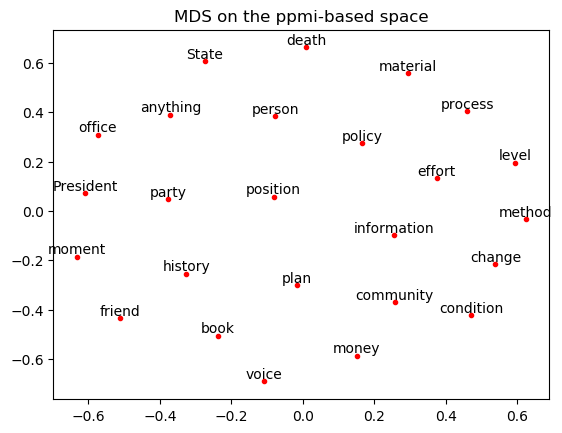

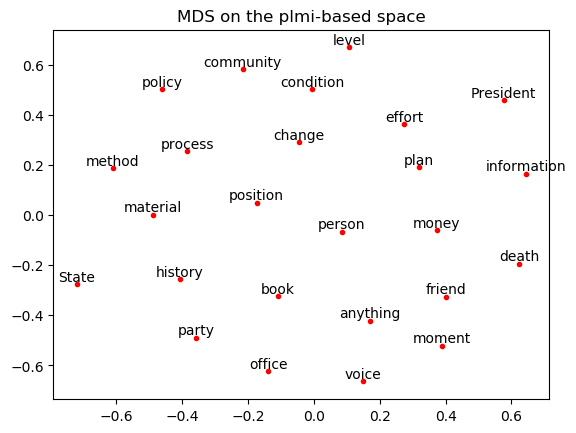

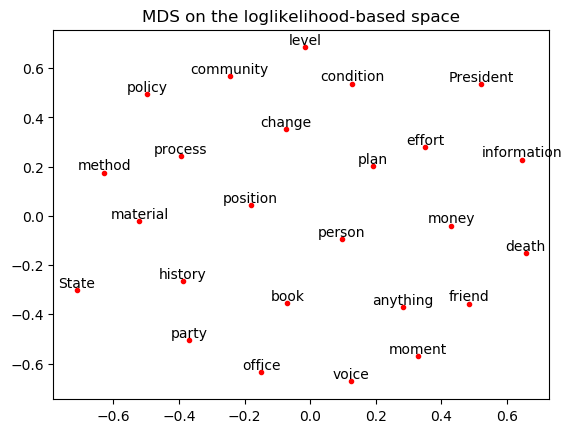

In [67]:
measure2mat = {"ppmi": ppmiMat, "plmi": plmiMat, "loglikelihood": llMat}

labels = [p[0].split("-")[0] for p in lemmas2plot]

for i, (m, mat) in enumerate(measure2mat.items()):
    # we need a DISTANCE matrix
    distMat = sklearn.metrics.pairwise.pairwise_distances(mat[lemmas2plot_idxs,:], metric="cosine")
    
    # let's reduce the dimensionality
    mds = sklearn.manifold.MDS(n_components = 2, max_iter = 300, eps = 1e-9, 
                               random_state = np.random.RandomState(seed = 6), 
                               dissimilarity = "precomputed")

    coords = mds.fit(distMat).embedding_
    
    # let's plot the distances
    plt.scatter(coords[:, 0], coords[:, 1], marker = '.', c = 'r')
    
    
    
    for label, x, y in zip(labels, coords[:, 0], coords[:, 1]):
        plt.annotate(label, xy = (x,y), horizontalalignment = 'center', verticalalignment='bottom')

    plt.title("MDS on the " + m +"-based space")

    plt.show()

### Clustering

Another viable option is to perform use the pairwise similarities in order to organize our words into groups (i.e. to perform **clustering**). The general idea is to organize clusters so as to maximize the **within-group similiarities** and the **between-group differences**. There are many clustering algorithms and techniques, all of them with their pros and cons. 

**Hierachical clustering** techniques do not try to produce a single clustering, but try to produce a hierarchy of groups. As such, they are quite useful in exploratory analysis. In this class, the **Ward** algorithm is an example of **agglomerative** clustering:  each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. In the Ward's method, the distance between two clusters is the change in the sum of squared distances when they are merged.

We can use the `scipy.cluster.hierarchy.ward()` function to create our hierarchical clustering and the  `scipy.cluster.hierarchy.dendrogram()` function to visualize it (i.e. to create a dendrogram).

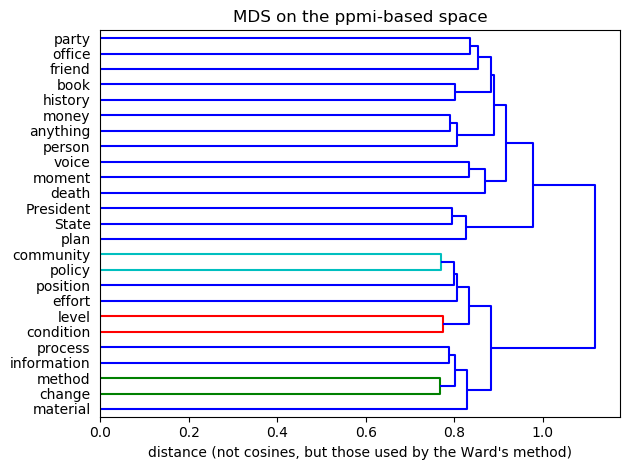

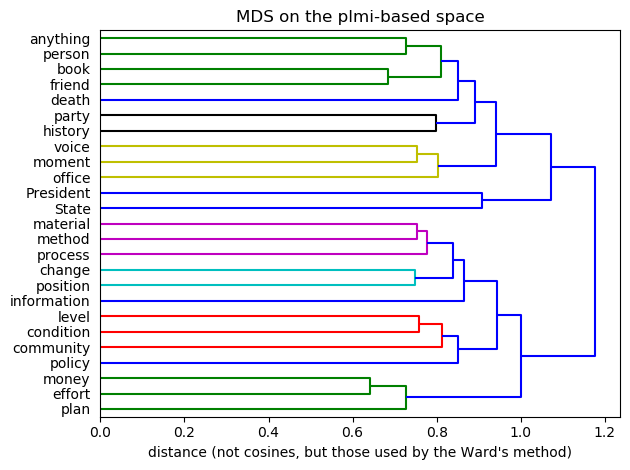

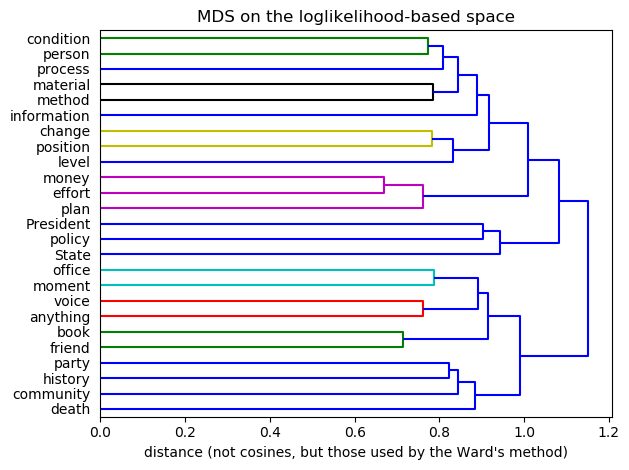

In [68]:
measure2mat = {"ppmi": ppmiMat, "plmi": plmiMat, "loglikelihood": llMat}

labels = [p[0].split("-")[0] for p in lemmas2plot]

for i, (m, mat) in enumerate(measure2mat.items()):
    
    # let's built a DISTANCE matrix
    distMat = sklearn.metrics.pairwise.pairwise_distances(mat[lemmas2plot_idxs,:], metric="cosine")
    
    # as we'll rely the scikit learn function to perform clustering, it is safer to convert our redundant distance matrix 
    # into a condensed distance matrix (i.e. into a flat array containing the upper triangular of the distance matrix)
    condensed_distMat = scipy.spatial.distance.squareform(distMat)
    
    # we could alternatively have used scipy.spatial.distance.pdist() to obtain the distance matric in this format
    # scipyPdist = scipy.spatial.distance.pdist(mat[lemmas2plot_idxs,:], "cosine")
    
    # let's perform the hierarchical clustering
    linkage_matrix = scipy.cluster.hierarchy.ward(condensed_distMat)
    
    # let's create the dendrogram (i.e. let's visualize the structure of the groups)
    scipy.cluster.hierarchy.dendrogram(linkage_matrix, orientation="right", labels=labels)
    
    plt.xlabel ("distance (not cosines, but those used by the Ward's method)")

    plt.title("MDS on the " + m +"-based space")
    
    plt.tight_layout()

    plt.show()

## Evaluating your Model

VSMs can be evaluated on **semantic similarity tasks**, in which they are required to simulate the pairwise similarity judgments collected from speakers.

In what follows we evaluate our models against the [WordSim-353 dataset](http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/):


- 353 noun pairs rated on a 0-10 scale 


- measure: [Spearman's correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between algorithm and human word similarity ratings

In [99]:
# let's select the pairs of nouns for which we have enough distributional information

wordSim353 = dict()

with open("data/wordSim353.csv","r") as infile:
    for line in infile:
        raw_w1, raw_w2, rating = line.strip().split(",")
        w1 = raw_w1+"-NOUN"
        w2 = raw_w2+"-NOUN"
        if all([w in vectors_indices for w in [w1,w2]]):
            wordSim353[(w1, w2)] = float(rating)

- Note that due to the size of our corpus we've lost 1/3 of the dataset

In [100]:
print(len(wordSim353))

214


In [101]:
measure2mat = {"positivePMI": ppmiSimMat, "positiveLMI": plmiSimMat, "log-likelihood": llSimMat}

rhos = []
measures = []

for m, mat in measure2mat.items():
    print(m+"-based space vs. wordSim353 -> spearman's rho:\t", )
    
    wordSim_ratings = []
    vsm_sims = []
    for (w1, w2), r in wordSim353.items():
        w1idx = vectors_indices[w1]
        w2idx = vectors_indices[w2]
        
        wordSim_ratings.append(r)
        vsm_sims.append(mat[w1idx, w2idx])
        
    rho, pval = scipy.stats.spearmanr(wordSim_ratings, vsm_sims)
    
    print(rho)
    rhos.append(rho)
    measures.append(m)

positivePMI-based space vs. wordSim353 -> spearman's rho:	
0.23859151595816275
positiveLMI-based space vs. wordSim353 -> spearman's rho:	
0.2679884064440214
log-likelihood-based space vs. wordSim353 -> spearman's rho:	
0.2822227611511011


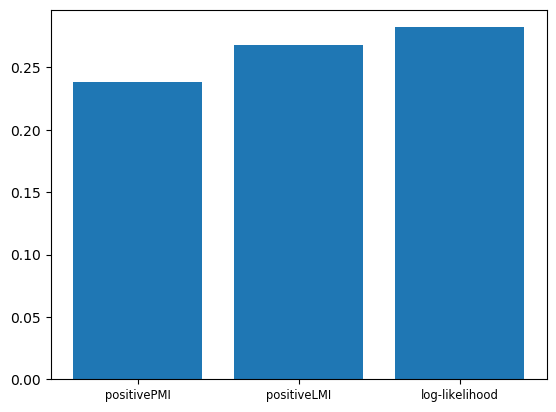

In [102]:
plt.bar(range(0, len(rhos)), rhos)
plt.xticks(range(0, len(rhos)), measures, size='small')
plt.show()

---

## Working with Dense Vectors

Up to this moment, we've worked with **long** and **sparse** vectors:


- the proportion of non-zeros in our ppmi weighted matrix is:

In [103]:
np.count_nonzero(ppmiMat) / ppmiMat.size

0.01753915493987258

- the length of our vectors:

In [104]:
ppmiMat.shape[1]

7576

**Denser** representations have a number of **advantages**, among which:

- their computationally easier to manipulate (e.g. to create  or to use as ML features)


- they tend to be less noisy


- they exploit latent meaning dimensions (e.g. they may tend to merge together correlated contexts like *car* and *automobile*)

> **Dimensionality Reduction**: the process of reducing the number of features (i.e. contextual markers) by mapping data points (i.e. the vectors describing the target words) into a **low-dimensional subspace**.

### Dimensionality Reduction via Singular Value Decomposition

- *The SVD is the Swiss Army knife of matrix decompositions* (O'Leary, 2006).


- SVD is a method for finding, for a given dataset, the **dimensions on which the data varies the most** (J&M).

**Intuitive Idea**: rotate the axes of the dataset into a new space, so that the order of the dimension is related to the quantity of captured variance

- first dimension capture the most variance, then the second captures most of the variance unexplained by the first dimension and so on...


- many related methods: PCA, Factor Analysis, **SVD**

#### Matrix Factorization

SVD **factorizes** a (non-symmetric, non-square) $w \times c$ matrix $M$ into the **product of three matrices**: $U \cdot\Sigma \cdot V^T$, where:


- $U$: the rows correspond to the rows of M (i.e. our target words) and the columns represent the dimensions of the **latent space**:
    - dimensions are orthogonal
    - dimensions are sorted according to the amount of variance they explain
    - e.g. the word frequency distribution for any latent topic
    
    
- $\Sigma$: a diagonal $m \times m$ matrix (where $m$ is the rank of our matrix $M$) of singular values in decreasing order:
    - intuitively, the **square** of each singular value $\sigma$ express the importance of each dimension
    - e.g. the prior frequency of each latent topic

    
- $V^T$: the columns correspond the columns of M and the rows correspond to the singular values:
    - e.g. the contribution of each latent topic to each context

$$\mathop{\begin{bmatrix}
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & M & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
\end{bmatrix}}_{\textstyle w \times c} \ = \
\mathop{\begin{bmatrix}
 & & & & \\
 & & & & \\
 & & & & \\
 & & & & \\
 & & U & & \\
 & & & & \\
 & & & & \\
 & & & & \\
 & & & & \\
\end{bmatrix}}_{\textstyle w \times m}\ 
\mathop{\begin{bmatrix}
\sigma_1 & 0 & 0 & \cdots & 0 \\
0 & \sigma_2 & 0 & \cdots & 0 \\
0 & 0 & \sigma_3 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \sigma_m \\
\end{bmatrix}}_{\textstyle m \times m}\ 
\mathop{\begin{bmatrix}
 & & & & & &\\
 & & & & & &\\
 & & & V^T & & &\\
 & & & & & &\\
 & & & & & &\\
\end{bmatrix}}_{\textstyle m \times c}$$

#### Truncation

If we use the **first $d$ singular values**, we obtain a **truncated matrix** $\tilde{M}_d$ that is **a least-squares approximation** to the original $M$


- dimensions $d < x < m$ are descarded
    - by removing the dimensions that encode the least variance, we **remove noise**


- generally $50 < d < 1000$ (with a soft spot around 300)


- some authors (Lapesa & Evert, 2014) suggest that for some task it may be useful to get rid of the very first dimensions as well

$$\mathop{\begin{bmatrix}
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & \tilde{M}_d & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
 & & & & & &\\
\end{bmatrix}}_{\textstyle w \times c} \ = \
\mathop{\begin{bmatrix}
 & & \\
 & & \\
 & & \\
 & & \\
 & U_d &\\
 & & \\
 & & \\
 & & \\
 & & \\
\end{bmatrix}}_{\textstyle w \times d}\ 
\mathop{\begin{bmatrix}
 & &\\
 & \Sigma_d & \\
 & & \\
\end{bmatrix}}_{\textstyle d \times d}\
\mathop{\begin{bmatrix}
 & & & & & &\\
 & & & V^T_d & & &\\
 & & & & & &\\
\end{bmatrix}}_{\textstyle d \times c}$$

#### Embedding

We can take advantage of the fact that **dot-products between** the rows of $W = U_d \cdot \Sigma_d$ are equal to those of the rows of $\tilde{M}_d = U_d \cdot \Sigma_d\cdot V^T_d$, so that we can **ignore $V^T_d$** and take the rows of $W$ as our word representations.

Recently, it has been showed that an additional parameter $p$ should be added to control the eigenvalue matrix $\Sigma$, so that we will take as **word representations** the rows of the $W'$ matrix, defined as:

$$W' = U_d \cdot \Sigma_d^p$$

- note that for some tasks, it has been suggested that ignoring $\Sigma$ alltogether (i.e. setting $p = 0$) may lead to an increase in performance


- some authors (e.g., J&M) use this setting as the default, but it is wise to spend some time tuning this hyperparameters

#### With Python

METHOD 1: **using Scikit-learn**


- you cannot set $p$ (it's always $p = 1$)


- you cannot discard the first dimensions, if you want to

In [105]:
dimensions = 300

In [106]:
# note that the default SVD solver is the randomized algorithm proposed by Halko (2009), but we select the ARPACK wrapper 
# in SciPy (scipy.sparse.linalg.svds) because is more efficient (but slower)
ppmiMat_tr300 = sklearn.decomposition.TruncatedSVD(n_components = dimensions, algorithm = "arpack").fit_transform(ppmiMat)

ppmiSVD300SimMat = sklearn.metrics.pairwise.cosine_similarity(ppmiMat_tr300)

In [107]:
measure2mat = {"ppmi_SVD300": ppmiSVD300SimMat}

for m, mat in measure2mat.items():
    print(m+"-based space vs. wordSim353 -> spearman's rho:\t",)
    
    wordSim_ratings = []
    vsm_sims = []
    for (w1, w2), r in wordSim353.items():
        w1idx = vectors_indices[w1]
        w2idx = vectors_indices[w2]
        
        wordSim_ratings.append(r)
        vsm_sims.append(mat[w1idx, w2idx])
        
    rho, pval = scipy.stats.spearmanr(wordSim_ratings, vsm_sims)
    
    print(rho)
    rhos.append(rho)
    measures.append(m)

ppmi_SVD300-based space vs. wordSim353 -> spearman's rho:	
0.41869170572654707


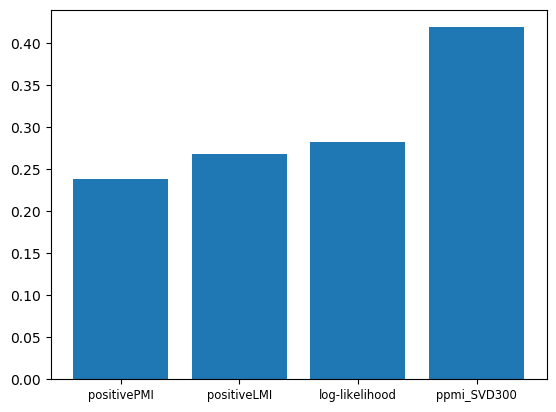

In [108]:
plt.bar(range(0, len(rhos)), rhos)
plt.xticks(range(0, len(rhos)), measures, size='small')
plt.show()

Well, it worked! But let's see what happens if we play a bit with our hyperparamaters...

METHOD 2: **using Scipy modules**

We can (roughly) re-implement what we've done with scikit-learn as follows:

In [109]:
from scipy import linalg, dot

# let's decompose our matrix (we can safely ignore Vt)
U, s, Vt = linalg.svd(ppmiMat)  

# SVD suffers from a problem called "sign indeterminancy", so that the sign of the components (i.e. U and Vt) depends
# on the initial state and on the algorithm. As a consequence, if U (and V) are mostly negative, 
# their sign should be inverted
if not U[U>0].size > (U.size / 2):
    U = -U
    Vt = -Vt

In [110]:
# let's filter out all dimensions but the first 300
W = U[:, 0 : dimensions]
sigma = s[:dimensions]  # note that for efficiency reasons sigma is an array, not a matrix
C = Vt[0 : dimensions, :]

ppmiMat_tr300_alt = dot(W, linalg.diagsvd(sigma, dimensions, len(C)))

Re. explained variance, see the **Scree Plot**, a graph plotting variances against singular values.

We can choose how many dimensions to retain by checking the portion of variance each dimension is able to explain:

- given that the square of each singular value is proportional to the variance explained by each singular vector, we compute the relative contribution of each singular value by dividing the square of the singular value $k$ by the sum of the squares of all the singular values

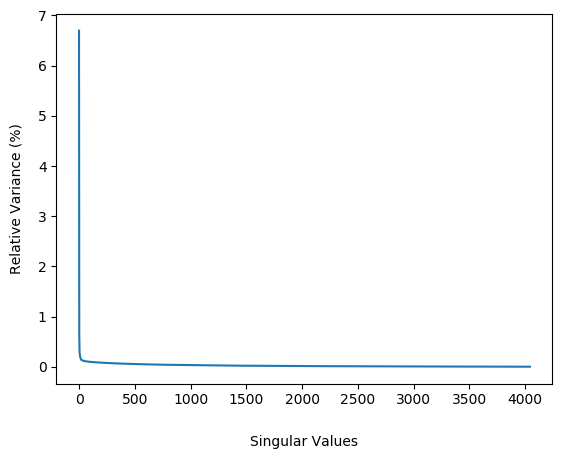

In [111]:
rel_variance = ( s**2 / sum(s**2) ) * 100
y_values =  rel_variance
x_values = np.arange(len(y_values))

plt.plot(x_values, y_values, linestyle = '-')

plt.xlabel("Singular Values", labelpad = 20)
plt.ylabel("Relative Variance (%)", labelpad = 10)

plt.show()

Let's focus on the first singular values...

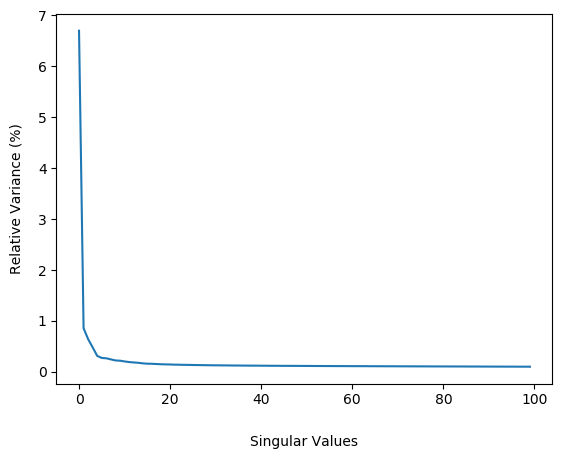

In [112]:
y_values =  rel_variance[:100] 
x_values = np.arange(len(y_values))

plt.plot(x_values, y_values, linestyle = '-')

plt.xlabel("Singular Values", labelpad = 20)
plt.ylabel("Relative Variance (%)", labelpad = 10)

plt.show()

In [113]:
dimensions = 50

W = U[:, 0 : dimensions]
sigma = s[:dimensions]
C = Vt[0 : dimensions, :]

ppmiMat_tr50 = dot(W, linalg.diagsvd(sigma, dimensions, len(C)))

In [114]:
measure2mat = {"ppmi_SVD50": ppmiMat_tr50}

for m, mat in measure2mat.items():
    print(m+"-based space vs. wordSim353 -> spearman's rho:\t",)
    
    sim = sklearn.metrics.pairwise.cosine_similarity(mat)
    
    wordSim_ratings = []
    vsm_sims = []
    for (w1, w2), r in wordSim353.items():
        w1idx = vectors_indices[w1]
        w2idx = vectors_indices[w2]
        
        wordSim_ratings.append(r)
        vsm_sims.append(sim[w1idx, w2idx])
        
    rho, pval = scipy.stats.spearmanr(wordSim_ratings, vsm_sims)
    
    print(rho)
    rhos.append(rho)
    measures.append(m)

ppmi_SVD50-based space vs. wordSim353 -> spearman's rho:	
0.48043166566727236


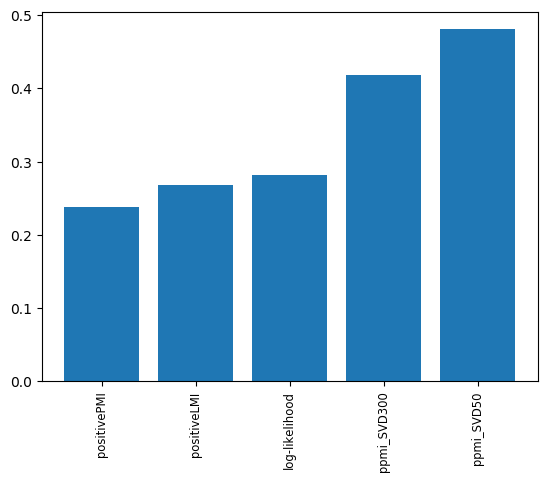

In [115]:
plt.bar(range(0, len(rhos)), rhos)
plt.xticks(range(0, len(rhos)), measures, size='small', rotation='vertical')
plt.show()

---

WEIGHTING $\Sigma$

Some authors suggested to downgrade the influence of $\Sigma$ on the final word representation by applying a weight $0 < p < 1$

In [116]:
dimensions = 50

In [117]:
# let's use only U, i.e. if p == 0

p = 0.

W = U[:, 0 : dimensions]
sigma = s[:dimensions]
C = Vt[0 : dimensions, :] 

ppmiMat_tr50_p0 = dot(W, linalg.diagsvd(sigma ** p , dimensions, len(C)))

In [118]:
# let's use only U, i.e. if p == 0

p = 0.

W = U[:, 0 : dimensions]
sigma = s[:dimensions] ** p
C = Vt[0 : dimensions, :] 

ppmiMat_tr50_p0 = dot(W, linalg.diagsvd(sigma, dimensions, len(C)))

In [119]:
# this is equivalent to using only W
np.allclose(ppmiMat_tr50_p0, W)

True

In [120]:
p = 0.5

W = U[:, 0 : dimensions]
sigma = s[:dimensions]
C = Vt[0 : dimensions, :] 

ppmiMat_tr50_p5 = dot(W, linalg.diagsvd(sigma ** p, dimensions, len(C)))

In [121]:
measure2mat = {"ppmi_SVD50_p.0": ppmiMat_tr50_p0,
              "ppmi_SVD50_p.5": ppmiMat_tr50_p5,}

for m, mat in measure2mat.items():
    print(m+"-based space vs. wordSim353 -> spearman's rho:\t",)
    
    sim = sklearn.metrics.pairwise.cosine_similarity(mat)
    
    wordSim_ratings = []
    vsm_sims = []
    for (w1, w2), r in wordSim353.items():
        w1idx = vectors_indices[w1]
        w2idx = vectors_indices[w2]
        
        wordSim_ratings.append(r)
        vsm_sims.append(sim[w1idx, w2idx])
        
    rho, pval = scipy.stats.spearmanr(wordSim_ratings, vsm_sims)
    
    print(rho)
    rhos.append(rho)
    measures.append(m)

ppmi_SVD50_p.0-based space vs. wordSim353 -> spearman's rho:	
0.47631668876563005
ppmi_SVD50_p.5-based space vs. wordSim353 -> spearman's rho:	
0.48865978270062627


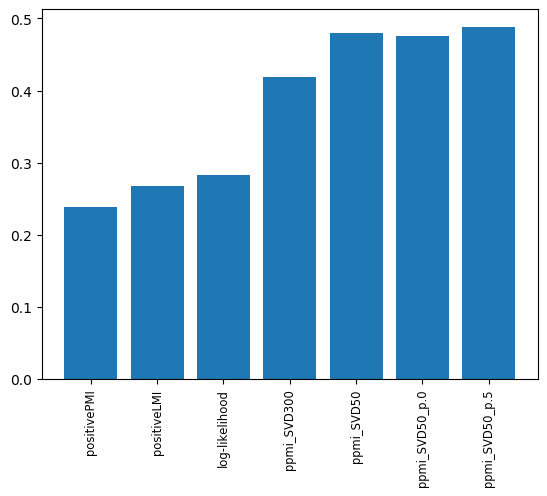

In [122]:
plt.bar(range(0, len(rhos)), rhos)
plt.xticks(range(0, len(rhos)), measures, size='small', rotation='vertical')
plt.show()

---

### Exercise 1.

Apply SVD to the PLMI Weighted dense matrix `plmiMat` and evaluate the model

In [98]:
# your code here

### Exercise 2.

Create and evaluate a plmi-weighted vector space model based on the co-occurrences in a ±10 words collocational span

In [ ]:
# your code here

### Exercise 3.

create a plmi-based space build from the following **sentence splitted and tokenized** version of the Brown corpus obtained by:

- filtering out the tokens composed solely by punctuation marks and

- lowering all the tokens

In [ ]:
import string

brown_words_raw = []

for sentence in nltk.corpus.brown.sents():
    brown_words_raw.append([w.lower() for w in sentence if not set(w).issubset(string.punctuation)])

In [ ]:
# your code here

---